## Multidimensional sampling 

This example is an adaptation of an emcee tutorial: https://emcee.readthedocs.io/en/stable/tutorials/quickstart/.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import emcee

We first need to define the probability distribution function. We use a gaussian in this example:

$$ p(\vec{x}) \propto \exp\left( -\dfrac{1}{2}(\vec{x} - \vec{\mu})^T \sigma^{-1}(\vec{x} - \vec{\mu})  \right), $$

wherein the arrow indicates a vector whose components are directly associated to each dimension, $\vec{\mu}$ is the mean, and $\sigma$ denotes the covariance matrix.

It is often convenient to use the logarithm of the function. In emcee, in particular, this is required.

In [9]:
def lnProb(x, mu, icov):
    diff = x - mu
    return -np.dot(diff, np.dot(icov, diff)) / 2.

In [10]:
ndim = 4 # number of dimensions
means = np.random.rand(ndim)

In [11]:
# setup ndim parameters 
cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)
icov = np.linalg.inv(cov)

There are two relevant quantities: the number of walkers is associated to the size of the sample, whereas the number of iterations relates to the number of steps we assume (obviously the algorithm should converge before the maximum number of iterations is reached).

In [13]:
# Choosing number of walkers (nwalkers)
# The initial guess is a nwalkers x ndim array 
nwalkers = 100
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnProb, args = [means, icov])

It is often advisable to let the walkers move a little bit in the parameter space, to guarantee that when we execute the code "for good", their starting positions are near regions with high probability density.

In [14]:
nburn = 100
pos, prob, state = sampler.run_mcmc(p0, nburn)
sampler.reset()

Now we do the MCMC for real:

In [15]:
nsteps = 10000
sampler.run_mcmc(pos, nsteps)

State([[ 0.82765993 -0.39707256 -0.15463297 -0.50992233]
 [ 0.74889364 -0.34500423  0.01184295 -0.36058028]
 [ 0.66403345 -0.37054806  0.66355485 -0.36812437]
 [ 0.82650474 -0.53088413  0.41474549 -0.27524297]
 [ 0.07450189  0.79820986 -1.32746076 -0.48382792]
 [-0.05950578  0.40504677  0.48750191  0.64248457]
 [-0.17197505  0.87373549 -0.80653197  0.25749815]
 [ 0.56831892 -0.67658641  1.97113158  0.63019028]
 [ 0.33982323  0.13442466 -0.37161898  0.23205092]
 [ 1.40043242 -1.17860462  1.00773854 -1.66022139]
 [ 0.05132916  0.69957463 -1.14720881  0.02451194]
 [ 0.5076996  -0.19128937  0.66629527 -0.21663784]
 [ 0.43568959 -0.07329376  0.65462827 -0.44717924]
 [ 0.02886731  0.06635138  1.46207792  1.11414294]
 [-0.19136318  0.50991228  0.62129548  0.83294696]
 [ 0.38968344  0.05821463 -0.3417968   0.36005455]
 [ 0.85183488 -0.45190148  0.04023413 -0.39352607]
 [ 0.31556114  0.09998436  0.20549583  0.09438939]
 [ 1.12031105 -0.5875084  -0.6124782  -1.07398487]
 [ 0.85241675 -0.2430655 

Let's plot the results. Don't worry about this part, as there are some things (like flatchain) that are particular to the code we are using. We are now just using emcee as a "black box" to understand the underlying theory.

Text(0.5, 1.0, 'dimension: 4')

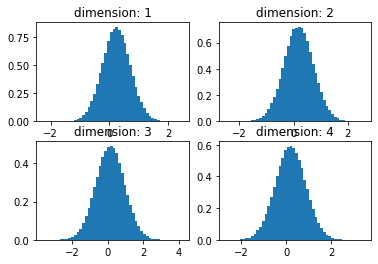

In [16]:
nbins = 50
plt.figure()
plt.subplot(2, 2, 1)
plt.hist(sampler.flatchain[:, 0], bins = nbins, density = True)
plt.title('dimension: 1')
plt.subplot(2, 2, 2)
plt.hist(sampler.flatchain[:, 1], bins = nbins, density = True)
plt.title('dimension: 2')
plt.subplot(2, 2, 3)
plt.hist(sampler.flatchain[:, 2], bins = nbins, density = True)
plt.title('dimension: 3')
plt.subplot(2, 2, 4)
plt.hist(sampler.flatchain[:, 3], bins = nbins, density = True)
plt.title('dimension: 4')

We can look at how many events were accepted:

In [17]:
print(np.mean(sampler.acceptance_fraction))

0.59492
